In [1]:
# Internship Task-3: CNN Image Classification Model (CIFAR-10)

In [2]:
## Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
## Step 2: Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 53s 0us/step


In [4]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Flatten label arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

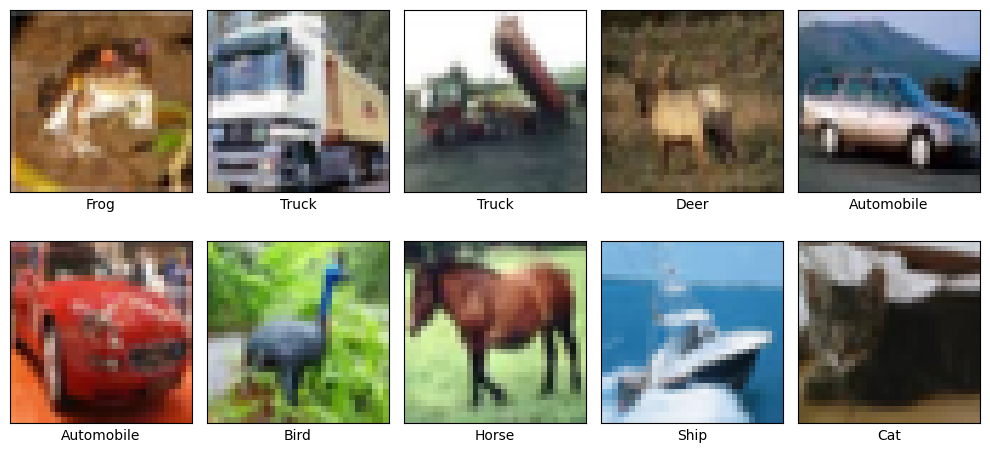

In [7]:
## Step 3: Visualize Some Training Images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [8]:
## Step 4: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\raush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
## Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
## Step 6: Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3469 - loss: 1.7514 - val_accuracy: 0.5578 - val_loss: 1.2390
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5709 - loss: 1.1995 - val_accuracy: 0.6155 - val_loss: 1.0989
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6501 - loss: 1.0001 - val_accuracy: 0.6537 - val_loss: 0.9863
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6811 - loss: 0.9067 - val_accuracy: 0.6770 - val_loss: 0.9274
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7123 - loss: 0.8238 - val_accuracy: 0.6817 - val_loss: 0.9092
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7297 - loss: 0.7673 - val_accuracy: 0.6734 - val_loss: 0.9403
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7490 - loss: 0.7126 - val_accuracy: 0.7013 - val_loss: 0.8634
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7661 - loss: 

In [11]:
## Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7064 - loss: 0.8698
Test accuracy: 0.7057


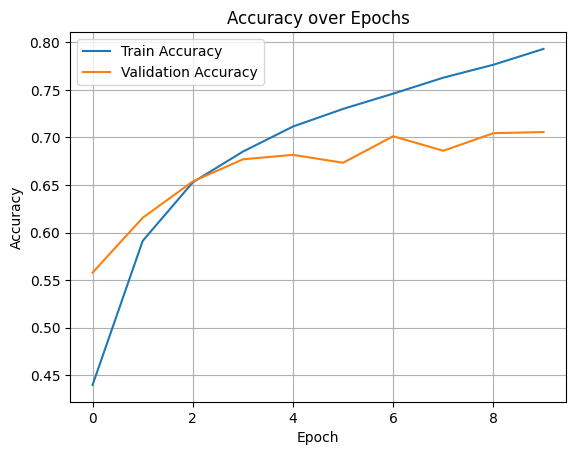

In [12]:
## Step 8: Plot Accuracy Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.grid(True)
plt.show()

In [13]:
## Step 9: Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


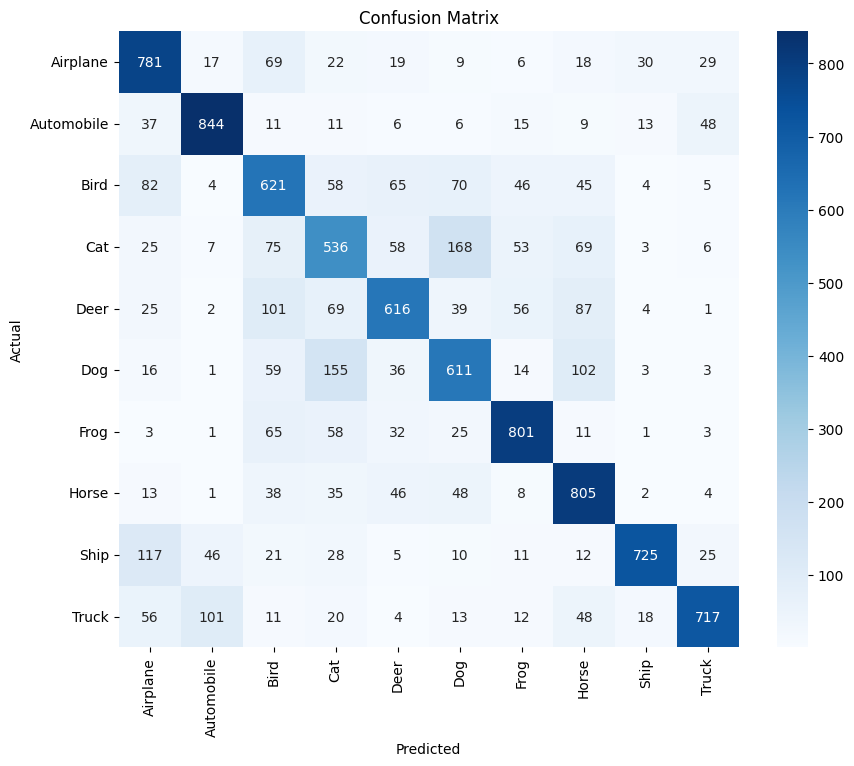

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
## Step 10: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

    Airplane       0.68      0.78      0.72      1000
  Automobile       0.82      0.84      0.83      1000
        Bird       0.58      0.62      0.60      1000
         Cat       0.54      0.54      0.54      1000
        Deer       0.69      0.62      0.65      1000
         Dog       0.61      0.61      0.61      1000
        Frog       0.78      0.80      0.79      1000
       Horse       0.67      0.81      0.73      1000
        Ship       0.90      0.72      0.80      1000
       Truck       0.85      0.72      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

